

# Project: Investigate a Dataset - [soccer database ]
## Author : Augustine Ugbeda

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 This soccer database comes from Kaggle and is well suited for data analysis. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. It has over 25,000 matches ,over 10,000 players,11 European Countries with their lead championship and Players and Teams' attributes.It is subdivided into tables like "player table","match table","payer_attribute" and so on.


### Question(s) for Analysis
During  the course of my analysis,i will be trying to get answers to numerous questions such as:

1.Which players have the highest and lowest overall rating

2.How many players met,exceeded or were below their potential 

3.Do young players have more agility than older players?

4.is there a relationship between age and overall rating?

5.Is there a relationship between buildup play speed and chance creation shooting?

6.how many goals scored per season in various leagues

7.Do home teams win more matches than away teams?

In [271]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import datetime
from IPython.display import Image
from dateutil.relativedelta import relativedelta

In [272]:
player=pd.read_csv("Player.csv")
player_attr=pd.read_csv("player_Attributes.csv")
Team= pd.read_csv("team.csv")
team_attr=pd.read_csv("team_attributes.csv")
Match= pd.read_csv("match.csv")
League= pd.read_csv("League.csv")

<a id='wrangling'></a>
## Data Wrangling






In [273]:
player_attr.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [274]:
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67



### Data Cleaning
 #### Merging data sets
  I will be merging players and players attributes into one dataset,team and team attributes into one and match and league into one

In [275]:
player_main=player.merge(player_attr,how='inner', on='player_fifa_api_id')

In [276]:
player_main.head(1)

,id_x,player_api_id_x,player_name,player_fifa_api_id,birthday,height,weight,id_y,player_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,505942,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [277]:
team_main=Team.merge(team_attr,how='inner', on='team_api_id')

In [278]:
team_main.head(1)

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22 00:00:00,45,Balanced,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover


In [279]:
Match_main=League.merge(Match,how='inner', on='country_id')

In [280]:
Match_main.head(1)

,id_x,country_id,name,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,Belgium Jupiler League,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


#### Extracting the columns i will be working with from the various dataframes

In [281]:
match_final = Match_main[["name","season","date","home_team_goal","away_team_goal"]]
player_final= player_main[["player_name","birthday","date","overall_rating","potential","agility","sprint_speed"]]
team_final  = team_main[["team_long_name","buildUpPlaySpeed","date","buildUpPlaySpeedClass","chanceCreationShooting"]]

In [282]:
match_final.head(1)

,name,season,date,home_team_goal,away_team_goal
0,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,1,1


#### check for null

In [283]:
match_final.isnull().sum()

name              0
season            0
date              0
home_team_goal    0
away_team_goal    0
dtype: int64

In [284]:
player_final.isnull().sum()

player_name          0
birthday             0
date                 0
overall_rating     787
potential          787
agility           2664
sprint_speed       787
dtype: int64

In [285]:
###dropping rows with na
player_final.dropna(inplace=True)

In [286]:
##check if changes took place
player_final.isnull().sum()

player_name       0
birthday          0
date              0
overall_rating    0
potential         0
agility           0
sprint_speed      0
dtype: int64

In [287]:
team_final.isnull().sum()

team_long_name            0
buildUpPlaySpeed          0
date                      0
buildUpPlaySpeedClass     0
chanceCreationShooting    0
dtype: int64

#### Checking data types and shapes

In [288]:
player_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181265 entries, 0 to 183928
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_name     181265 non-null  object 
 1   birthday        181265 non-null  object 
 2   date            181265 non-null  object 
 3   overall_rating  181265 non-null  float64
 4   potential       181265 non-null  float64
 5   agility         181265 non-null  float64
 6   sprint_speed    181265 non-null  float64
dtypes: float64(4), object(3)
memory usage: 11.1+ MB


In [289]:
team_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   team_long_name          1458 non-null   object
 1   buildUpPlaySpeed        1458 non-null   int64 
 2   date                    1458 non-null   object
 3   buildUpPlaySpeedClass   1458 non-null   object
 4   chanceCreationShooting  1458 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 68.3+ KB


In [290]:
match_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            25979 non-null  object
 1   season          25979 non-null  object
 2   date            25979 non-null  object
 3   home_team_goal  25979 non-null  int64 
 4   away_team_goal  25979 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [291]:
match_final.shape

(25979, 5)

In [292]:
team_final.shape

(1458, 5)

In [293]:
player_final.shape

(181265, 7)

#### Converting Dates to date time

In [294]:
team_final["date"] = team_final["date"].apply(pd.to_datetime)

In [295]:
player_final[["date", "birthday"]] = player_final[["date", "birthday"]].apply(pd.to_datetime)

In [296]:
match_final["date"] = team_final["date"].apply(pd.to_datetime)

#### Creating an age column in player_final dataset

In [297]:
player_final["age"] = [relativedelta(a, b).years for a, b in zip(player_final["date"], player_final["birthday"])]

In [298]:
player_final.head(1)

,player_name,birthday,date,overall_rating,potential,agility,sprint_speed,age
0,Aaron Appindangoye,1992-02-29,2016-02-18,67.0,71.0,59.0,64.0,23


<a id='eda'></a>
## Exploratory Data Analysis






In [299]:
player_final.describe()

,overall_rating,potential,agility,sprint_speed,age
count,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000
mean,68.621493,73.471646,65.970910,68.084936,25.173177
std,7.029845,6.581667,12.954585,12.579815,4.722894
min,33.000000,39.000000,11.000000,12.000000,7.000000
25%,64.000000,69.000000,58.000000,62.000000,22.000000
50%,69.000000,74.000000,68.000000,69.000000,25.000000
75%,73.000000,78.000000,75.000000,77.000000,28.000000
max,94.000000,97.000000,96.000000,97.000000,43.000000


In [300]:
team_final.describe()

,buildUpPlaySpeed,chanceCreationShooting
count,1458.000000,1458.000000
mean,52.462277,53.969136
std,11.545869,10.327566
min,20.000000,22.000000
25%,45.000000,48.000000
50%,52.000000,53.000000
75%,62.000000,61.000000
max,80.000000,80.000000


In [301]:
match_final.describe()

,home_team_goal,away_team_goal
count,25979.000000,25979.000000
mean,1.544594,1.160938
std,1.297158,1.142110
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,9.000000


### Which players have the highest and lowest overall rating

In [302]:
player_final[player_main["overall_rating"]==player_final.overall_rating.max()]


<ipython-input-302-88c82a2c8292>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  player_final[player_main["overall_rating"]==player_final.overall_rating.max()]


,player_name,birthday,date,overall_rating,potential,agility,sprint_speed,age
102463,Lionel Messi,1987-06-24,2015-12-17,94.0,94.0,92.0,90.0,28
102464,Lionel Messi,1987-06-24,2015-10-16,94.0,94.0,92.0,90.0,28
102465,Lionel Messi,1987-06-24,2015-09-21,94.0,95.0,92.0,90.0,28
102472,Lionel Messi,1987-06-24,2014-04-25,94.0,97.0,94.0,88.0,26
102473,Lionel Messi,1987-06-24,2013-11-15,94.0,97.0,94.0,88.0,26
102474,Lionel Messi,1987-06-24,2013-09-20,94.0,97.0,94.0,88.0,26
102475,Lionel Messi,1987-06-24,2013-03-22,94.0,97.0,94.0,91.0,25
102476,Lionel Messi,1987-06-24,2013-03-08,94.0,97.0,94.0,91.0,25
102477,Lionel Messi,1987-06-24,2013-02-15,94.0,97.0,94.0,91.0,25
102478,Lionel Messi,1987-06-24,2012-08-31,94.0,96.0,94.0,92.0,25


#### Lionel Messi has the highest overall rating
![Messi](messi.jfif)

In [303]:
player_final[player_final["overall_rating"]==player_final.overall_rating.min()]

,player_name,birthday,date,overall_rating,potential,agility,sprint_speed,age
57814,Francesco Della Rocca,1987-09-14,2007-08-30,33.0,53.0,66.0,59.0,19
57815,Francesco Della Rocca,1987-09-14,2007-02-22,33.0,53.0,66.0,59.0,19


 #### Francesco Della Rocca is the player with the lowest overall rating
![Francesco](francesco.jfif)







### How many players met,exceeded or were below their potential ?

#### players below their potential

In [304]:
potential_lower=player_main[player_main["overall_rating"]<player_main.potential]

In [305]:
p1=potential_lower["player_name"].nunique()
p1

10662

#### players that met their potential

In [306]:
potential=player_final[player_final["overall_rating"]==player_final.potential]

In [307]:
p2=potential["player_name"].nunique()
p2

5072

#### players that exceeded their potential

In [308]:
potential_greater=player_main[player_main["overall_rating"]>player_main.potential]

In [309]:
p3=potential_greater["player_name"].nunique()
p3

560

In [310]:
# Create DataFrame for the various potentials
data = {'potential': ['Below Potential', 'Met Potential', 'Exceded Potential'], 'Player_count': [10662, 5072, 560]}
 
Potential_df = pd.DataFrame(data)
 

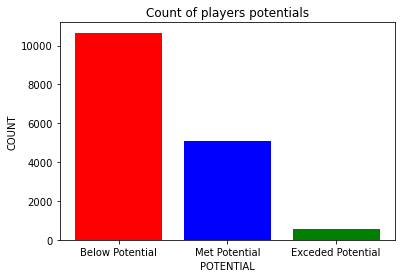

In [311]:
#creation of bar charts
plt.bar(Potential_df.potential, Potential_df.Player_count, color=['red', 'blue', 'green'])
plt.title('Count of players potentials')
plt.xlabel('POTENTIAL')
plt.ylabel('COUNT');
plt.show()


we have more players not meeting up to their potential ratings and have a small number of players exceeding their potential

#### DO YOUNG PLAYERS HAVE MORE AGILITY THAN OLDER PLAYERS?

In [312]:
## getting the median age and creating two data frames for old and young players and computing the mean for each age group
median = player_final['age'].median()
young = player_final.query('age < {}'.format(median))
old = player_final.query('age >= {}'.format(median))

young_agility = young['agility'].mean()
old_agility = old['agility'].mean()

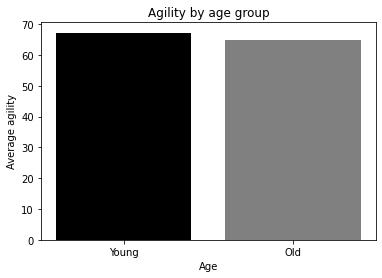

In [313]:
#creation of Bar charts
locations = [1, 2]
age = [young_agility,old_agility]
labels = ['Young', 'Old']
plt.bar(locations, age, tick_label=labels,color=['black','grey'])
plt.title('Agility by age group')
plt.xlabel('Age')
plt.ylabel('Average agility');

Young players on the average have more agility than old players

#### is there a relationship between age and overall rating?

Text(0, 0.5, 'Ratings')

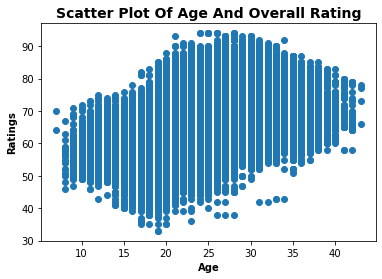

In [314]:
#pltting scatter plot
plt.scatter(player_final.age, player_final.overall_rating)
plt.title('Scatter plot of age and overall rating'.title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Age'.title(),
               fontsize = 10, weight = "bold")

plt.ylabel('Ratings'.title(),
               fontsize = 10, weight = "bold")


No relationship between age and Ratings

#### Is there a relationship between buildup play speed and chance creation shooting?

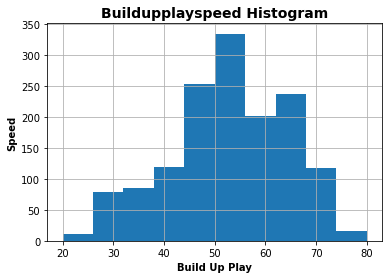

In [315]:
team_final. buildUpPlaySpeed.hist()
plt.title('BuildupPlaySpeed Histogram'.title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Build up play'.title(),
               fontsize = 10, weight = "bold")

plt.ylabel('Speed'.title(),
               fontsize = 10, weight = "bold");


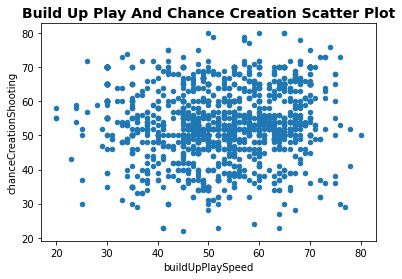

In [316]:
#plotting buildupPlaySpeed and chanceCreationShooting
team_final.plot(x="buildUpPlaySpeed", y="chanceCreationShooting", kind="scatter")
plt.title('Build up play and chance creation scatter plot'.title(),
               fontsize = 14, weight = "bold");


we can see that there is no relationship between build up play speed and chance creation

##### grouping buildup play class by buildup play speed

In [317]:
Buildup_play = team_final.groupby("buildUpPlaySpeedClass").buildUpPlaySpeed.mean()
Buildup_play

buildUpPlaySpeedClass
Balanced    51.925676
Fast        69.767442
Slow        29.509804
Name: buildUpPlaySpeed, dtype: float64

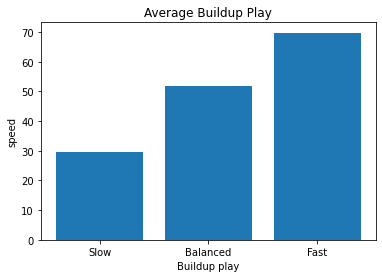

In [318]:
 ###Creating a bar chart 
locations = [2,3,1]  
heights = Buildup_play

labels = ['Balanced', 'Fast', 'Slow']

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Buildup Play')
plt.xlabel('Buildup play')
plt.ylabel('speed');

#### how many goals scored per season in various leagues

In [319]:
#### creating a goal column in match_final dataframe

In [320]:
match_final["goals"] = match_final["home_team_goal"] + match_final["away_team_goal"]


In [321]:
match_final.head(1)

,name,season,date,home_team_goal,away_team_goal,goals
0,Belgium Jupiler League,2008/2009,2010-02-22,1,1,2


In [322]:
###check for unique leagues
match_final.name.unique()

array(['Belgium Jupiler League', 'England Premier League',
       'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A',
       'Netherlands Eredivisie', 'Poland Ekstraklasa',
       'Portugal Liga ZON Sagres', 'Scotland Premier League',
       'Spain LIGA BBVA', 'Switzerland Super League'], dtype=object)

In [323]:
def mySeasonPlot(df,name, grpVar="season",yVar="goals",stat="sum",color="green"):
      '''
      this function is used to create barchats to visualise goals scored per season for various data sets
      inputs:match_final
      outputs:barchats
      '''
      #data preparation
      data=df.query(f'name=="{name}"').groupby([grpVar])[yVar].agg(stat)

      #plot
      data.plot.bar(edgecolor="black",
                      figsize=[14,6],
                      rot=0,
                      width=0.8,
                      color=color);
  
      # adding title
      plt.title(f'{stat} of {yVar} by {grpVar}: {name}'.title(),fontsize=14,weight="bold")
      
      #adding x label
      plt.xlabel(grpVar.title(),fontsize=10,weight="bold")
   
      #adding y label
      plt.ylabel(f'{stat} {yVar}'.title(),fontsize=10,weight="bold")
     
      #limits
      plt.ylim(data.min()*0.975,data.max()*1.025);

 


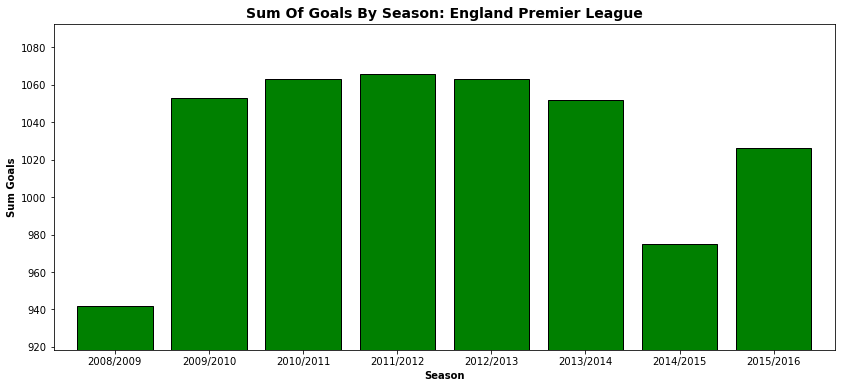

In [324]:
#bar charts for English premier league seasons
mySeasonPlot(match_final,"England Premier League")

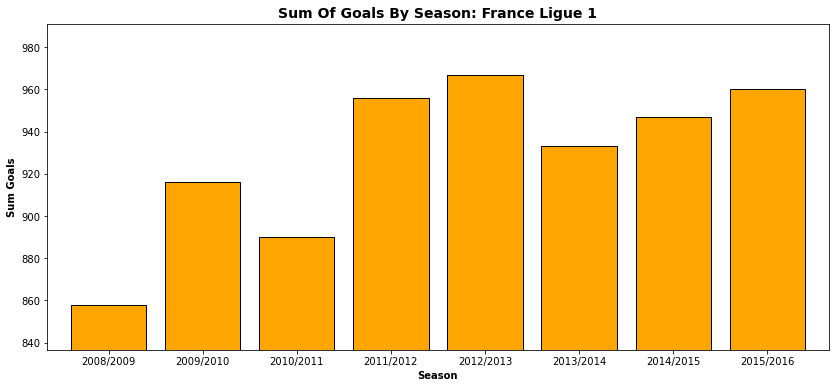

In [325]:
#bar charts for french league seasons
mySeasonPlot(match_final,"France Ligue 1",color="orange")


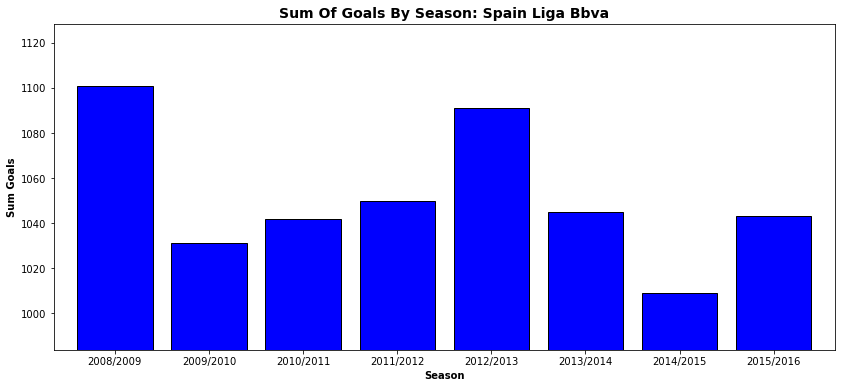

In [326]:
##Bar charts for Spanish liga seasons
mySeasonPlot(match_final,"Spain LIGA BBVA",color="blue")

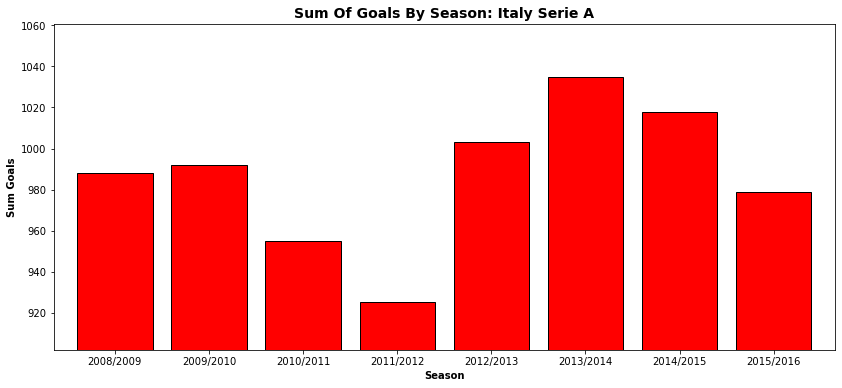

In [327]:
#bar chart for Italian seria A seasons
mySeasonPlot(match_final,"Italy Serie A",color="red")



### Do home teams win more matches than away teams?

In [328]:
###get home team wins
HomeTeam_wins=match_final[match_final.home_team_goal > match_final.away_team_goal].count()
HomeTeam_wins

name              11917
season            11917
date                682
home_team_goal    11917
away_team_goal    11917
goals             11917
dtype: int64

In [329]:
### get draws
Draws=match_final[match_final.home_team_goal==match_final.away_team_goal].count()
Draws

name              6596
season            6596
date               357
home_team_goal    6596
away_team_goal    6596
goals             6596
dtype: int64

In [330]:
#get away team wins
AwayTeam_wins=match_final[match_final.home_team_goal<match_final.away_team_goal].count()
AwayTeam_wins

name              7466
season            7466
date               419
home_team_goal    7466
away_team_goal    7466
goals             7466
dtype: int64

In [331]:
# Create DataFrame
data = {'Wins': ['HomeTeam_wins', 'Draws', 'AwayTeam_wins'], 'number': [11917, 6596, 7466]}
wins_draw = pd.DataFrame(data)

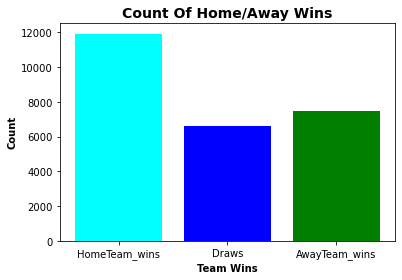

In [332]:
#plotting bar charts that shows hometeam wins,away team wins and draws
plt.bar(wins_draw.Wins, wins_draw.number, color=['cyan', 'blue', 'green'])


plt.title('Count of Home/Away wins'.title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Team wins'.title(),
               fontsize = 10, weight = "bold")

plt.ylabel('Count'.title(),
               fontsize = 10, weight = "bold")


plt.show()

The chart above shows that we have more Home team wins and less away team wins

<a id='conclusions'></a>
## Conclusions

From the above analysis, i can conclude that:

1.Lionel messsi is the player with the highest rating,with a rating of 94.0 while Francesco Della Roccahad the lowest rating, with a rating of 33.0

2.10662 players were below their potential rating,while 5072 players met their potential rating and 560 players exceeded their potential rating

3.young players on the average have more agility than old players

4.there is no relationship between age and overall rating

5.there is no relationship between buildup play speed and chance creation shooting

6.In the English premier league, the total number of goals scored peaked in the 2011/2012 season while there was a sharp decline in the 2008/2009 season .In France Ligue 1 ,the 2010/2011 season had the lowest number of goals while the 2012/2013 had the highest number of goals but there has been an icrease of goals overtime.in Spain LIGA BBVA the 2008/2009season had the highest number of goals scored while the 2014/2015 season had the lowest number of goals scored.in the Italy Serie A ,there was a sharp decline of goals scored in 2011/2012 while  2013/2014 had the highest number of goals scored.

7.Home teams win more matches than away teams.

The above analysis is not exhaustive as a lot more anaysis can be done on the dataset
